In [7]:
import pandas_gbq

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Set project_id to Google Cloud Platform project ID.
project_id = "concise-faculty-452613-a1"

sql = """
SELECT customer_city, AVG(days_diff) AS average_delivery_days
FROM `brazil_e_commerce.fact_order_delivery_duration`
GROUP BY customer_city
ORDER BY `customer_city`
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████|


In [9]:
df.head()

,customer_city,average_delivery_days
0,abadia dos dourados,11.333333
1,abadiania,29.000000
2,abaete,9.916667
3,abaetetuba,26.545455
4,abaiara,35.000000


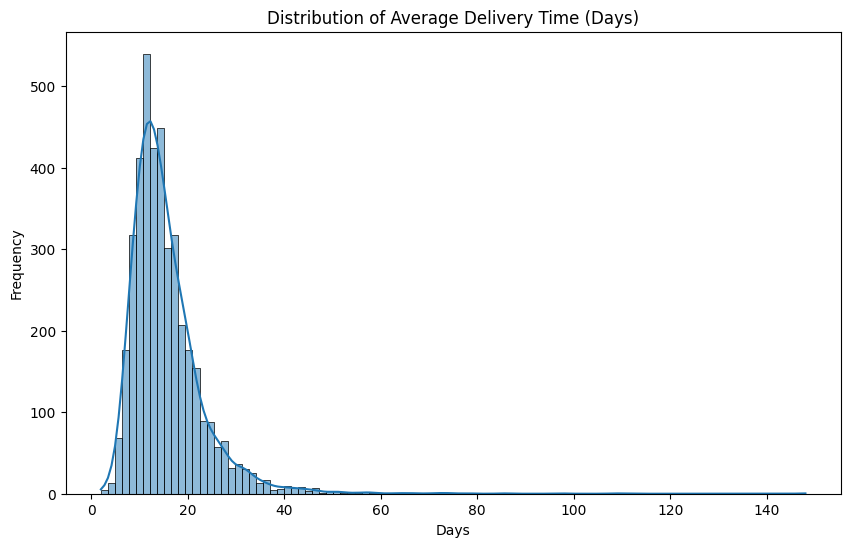

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_delivery_days'], bins=100, kde=True)
plt.title('Distribution of Average Delivery Time (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

In [11]:
project_id = "concise-faculty-452613-a1"

sql = """
SELECT payment_type, COUNT(*) AS payment_count FROM `concise-faculty-452613-a1.brazil_e_commerce.dim_payments`
GROUP BY payment_type
"""
df1 = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████|


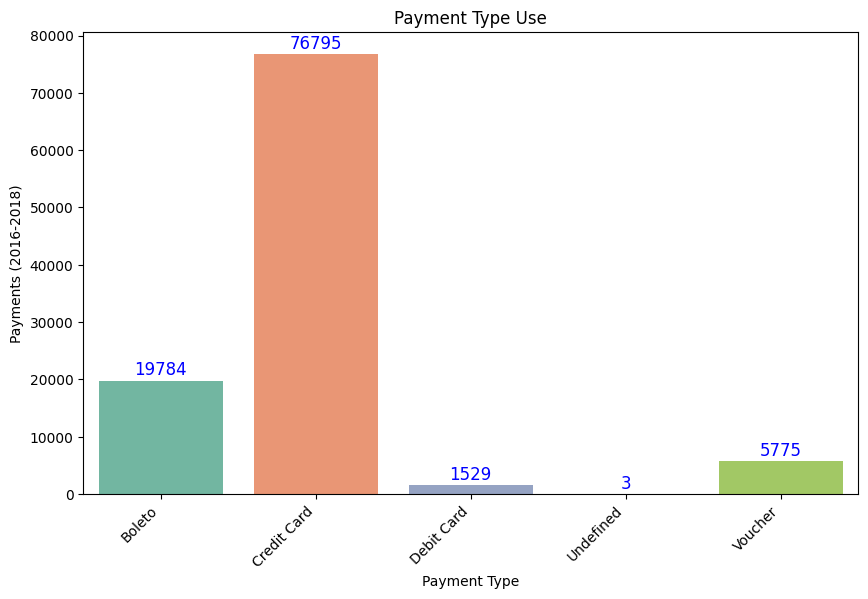

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='payment_type', y='payment_count', data=df1, hue="payment_type", palette='Set2', legend=False)
plt.title('Payment Type Use')
plt.xlabel('Payment Type')
plt.ylabel('Payments (2016-2018)')

# Custom labels (same length as number of payment types in df1)
custom_labels = ['Boleto', 'Credit Card', 'Debit Card', 'Undefined', 'Voucher']

# Setting the custom x-ticks
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, fontsize=10, ha='right')

# Adding y-values inside each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height() + 1000,      # Position inside the bar
            f'{int(p.get_height())}',  # Y-value text
            ha='center', color='blue', fontsize=12)
    
plt.show()

In [16]:
project_id = "concise-faculty-452613-a1"

sql = """
SELECT product_category_name_english, COUNT(*) AS category_orders 
FROM `concise-faculty-452613-a1.composer_test.dim_order_items` 
GROUP BY product_category_name_english
ORDER BY category_orders DESC
"""
df2 = pandas_gbq.read_gbq(sql, project_id=project_id)

df2['product_category_name_english'] = df2['product_category_name_english'].str.replace('_', ' ').str.title()

Downloading: 100%|██████████|


In [8]:
df2

,product_category_name,string_field_1,category_orders
0,cama_mesa_banho,Bed Bath Table,11115
1,beleza_saude,Health Beauty,9670
2,esporte_lazer,Sports Leisure,8641
3,moveis_decoracao,Furniture Decor,8334
4,informatica_acessorios,Computers Accessories,7827
...,...,...,...
66,artes_e_artesanato,Arts And Craftmanship,24
67,la_cuisine,La Cuisine,14
68,cds_dvds_musicais,Cds Dvds Musicals,14
69,fashion_roupa_infanto_juvenil,Fashion Childrens Clothes,8


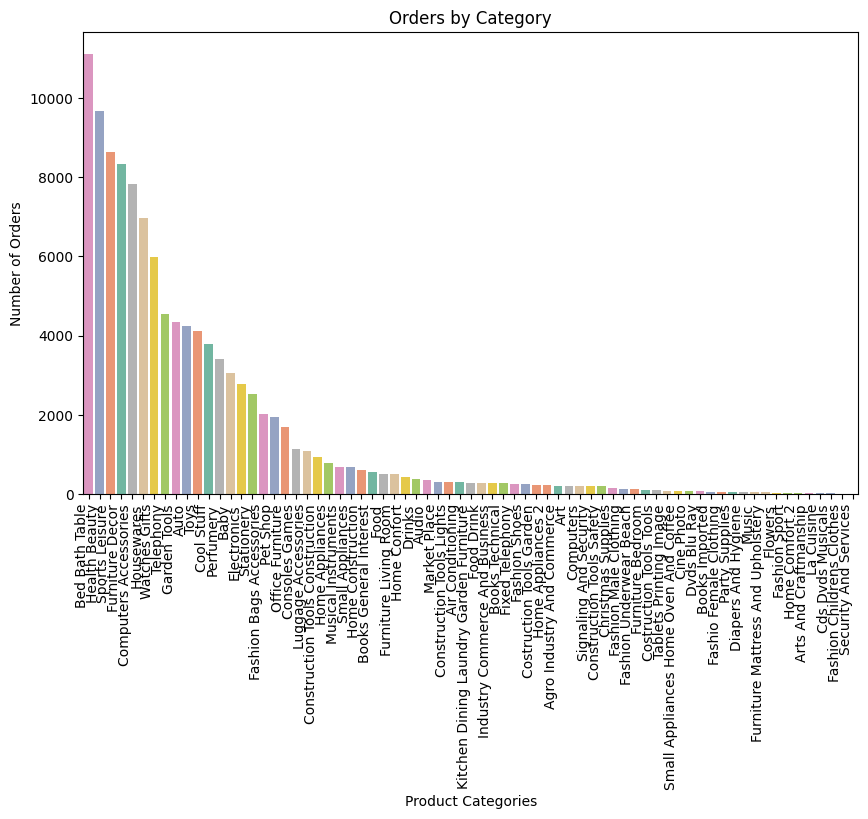

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='product_category_name_english', y='category_orders', data=df2, hue="category_orders", palette='Set2', legend=False)
plt.title('Orders by Category')
plt.xlabel('Product Categories')
plt.ylabel('Number of Orders')

# Setting the custom x-ticks
plt.xticks(rotation=90, fontsize=10, ha='right')

plt.show()